# Decision Trees

Decision trees are a popular type of model used in machine learning for both classification (predicting discrete categories) and regression (predicting continuous numbers). They work by recursively splitting a dataset based on feature values to create a model that is easy to interpret and visualize. Despite being very powerful and widely used in real-world applications (including many machine learning competitions), decision trees sometimes receive less academic attention than other methods.

*Example Context:*  
Imagine running a cat adoption center. You have a dataset with 10 examples where each animal is described by features such as **ear shape**, **face shape**, and **whiskers**. The task is to classify each animal as a cat or not a cat. In this example, the input features ($X$) are categorical (e.g., "pointy" vs. "floppy" ears) and the target variable ($Y$) is binary (cat = 1, not cat = 0).

---

## Structure of a Decision Tree

A decision tree consists of several types of nodes that form a branching structure:

- **Root Node:**  
  The topmost node that represents the entire dataset. All examples start here.

- **Decision Nodes:**  
  These are the internal nodes (often depicted as ovals) where a test is performed on one of the features. Depending on the outcome (e.g., "pointy ear" vs. "floppy ear"), the example is sent down different branches.

- **Leaf Nodes:**  
  Terminal nodes (often depicted as rectangles) that provide a final prediction. For classification, a leaf might say "cat" or "not cat"; for regression, it might output an average value (e.g., predicted weight).

*Clarification:*  
Although we call it a "tree," its structure is more like a flowchart. Think of it as asking a series of yes/no questions until you reach a conclusion. The convention of having the "root" at the top and "leaves" at the bottom is just a diagrammatic choice—similar to how indoor hanging plants display their roots above ground.

---

## How to Build a Decision Tree

The process of constructing a decision tree from a training set involves two main challenges:

### Choosing a Feature to Split On

At each node, you must decide which feature to use to divide the data. For instance, at the root node you might decide to split based on **ear shape**:
- All examples with **pointy ears** go to the left branch.
- All examples with **floppy ears** go to the right branch.

This decision is made by evaluating which feature best separates the classes (i.e., makes the groups as "pure" as possible).

### Deciding When to Stop Splitting

You cannot split indefinitely. Common stopping criteria include:
- **Pure Node:** Stop if all examples at a node belong to a single class (i.e., the node is pure).
- **Maximum Depth:** Set a limit on how many splits (or “hops” from the root) are allowed to prevent overly complex trees.
- **Minimal Information Gain:** If a potential split does not reduce impurity by a significant amount, you may decide to stop.
- **Minimum Sample Size:** If a node contains too few examples, further splitting might be unreliable.

---

## Measuring Purity with Entropy

To decide the best split, you need a way to quantify the “purity” of a set of examples. **Entropy** is a measure of impurity in a dataset.

### Entropy Definition

Let $p_1$ be the fraction of positive examples (e.g., cats). Then the entropy $H(p_1)$ is defined as:

$$
H(p_1) = -p_1 \log_2(p_1) - (1-p_1) \log_2(1-p_1)
$$

- **Maximum Entropy:**  
  When $p_1 = 0.5$, the classes are evenly mixed and $H(0.5) = 1$. This is the worst-case (most impure) scenario.
- **Minimum Entropy:**  
  When $p_1 = 0$ or $1$, the node is pure and $H(0) = H(1) = 0$.

*Example:*  
- If you have 3 cats and 3 dogs ($p_1 = 0.5$), the entropy is $1$.
- If you have 5 cats and 1 dog ($p_1 \approx 0.83$), the entropy is lower (around $0.65$).
- If all examples are cats ($p_1 = 1$), the entropy is $0$.

---

## Information Gain: Choosing the Best Split

**Information Gain (IG)** measures the reduction in entropy after a split. It tells you how much more “pure” the resulting subsets are compared to the original set.

### Information Gain Formula

If you split a node into two branches (left and right), the information gain is calculated as:

$$
\text{IG} = H(p_1^\text{root}) - \left( w^\text{left} \cdot H(p_1^\text{left}) + w^\text{right} \cdot H(p_1^\text{right}) \right)
$$

Where:
- $H(p_1^\text{root})$ is the entropy at the root node.
- $H(p_1^\text{left})$ and $H(p_1^\text{right})$ are the entropies of the left and right subsets.
- $w^\text{left}$ and $w^\text{right}$ are the proportions of examples in the left and right branches.

*Practical Example:*  
Suppose at the root node, there are 10 examples (5 cats, 5 dogs), so $p_1^\text{root} = 0.5$ and $H(0.5)=1$. Now, consider splitting on **ear shape**:
- **Left branch (pointy ears):** 5 examples with 4 cats ($p_1^\text{left} = 0.8$, entropy roughly $0.72$).
- **Right branch (floppy ears):** 5 examples with 1 cat ($p_1^\text{right} = 0.2$, entropy roughly $0.72$).
- With weights $w^\text{left}=w^\text{right}=0.5$, the weighted entropy is $0.5 \times 0.72 + 0.5 \times 0.72 = 0.72$.
- Information gain is then $1 - 0.72 = 0.28$.

The algorithm computes the information gain for each possible feature split and selects the one with the highest gain.

---

## Handling Different Feature Types

Decision trees can handle various types of input features, but different methods are used depending on whether the feature is categorical or continuous.

### Categorical Features

#### Binary Features
For features that take on only two values (e.g., "whiskers" can be either present or absent), the tree splits directly on the binary condition.

#### Multi-valued Features and One-Hot Encoding
When a feature has more than two possible values (e.g., **ear shape** might be "pointy", "floppy", or "oval"), one common approach is **one-hot encoding**:
- Replace the single multi-valued feature with $k$ binary features (where $k$ is the number of possible values).
- For example, if ear shape has three values, create three new features:
  - **Pointy Ear:** $1$ if pointy, otherwise $0$.
  - **Floppy Ear:** $1$ if floppy, otherwise $0$.
  - **Oval Ear:** $1$ if oval, otherwise $0$.
- Each example will have exactly one of these features set to $1$ ("hot") and the others set to $0$.

*Benefit:*  
This transformation allows the decision tree algorithm to work with each feature as a simple binary indicator.

### Continuous Features

Continuous features (like **weight**) can take any numerical value. The decision tree must choose an optimal threshold to split the data.

#### How to Split on Continuous Features:
1. **Sort the Examples:**  
   Arrange the data points by the continuous feature (e.g., weight).

2. **Consider Candidate Thresholds:**  
   Use the midpoints between consecutive values as potential thresholds.

3. **Evaluate Information Gain:**  
   For each candidate threshold, split the data into two subsets (e.g., weight $\leq t$ and weight $> t$) and calculate the resulting weighted entropy. Choose the threshold that maximizes information gain.

*Example:*  
For weight, testing thresholds like $8$, $9$, or $13$ might result in different splits. If splitting at $t=9$ gives the highest reduction in entropy (say, information gain of $0.61$ compared to lower gains at $t=8$ or $t=13$), then the threshold $9$ is chosen.

---

## Regression Trees: Predicting Continuous Values

While classification trees predict categories, **regression trees** are designed to predict continuous values (e.g., predicting an animal's weight).

### Key Differences from Classification Trees

- **Target Variable:**  
  In regression trees, the target is a number (e.g., weight) rather than a category.

- **Splitting Criterion:**  
  Instead of reducing entropy, regression trees aim to reduce the variance of the target variable. The goal is to create subsets where the target values are as similar as possible.

### Variance Reduction

For a node with target values, calculate the variance. When splitting, compute the weighted variance of the resulting subsets:

$$
\text{Reduction in Variance} = \text{Variance}_\text{root} - \left( w^\text{left} \cdot \text{Variance}_\text{left} + w^\text{right} \cdot \text{Variance}_\text{right} \right)
$$

- **Leaf Node Prediction:**  
  At a leaf node, the prediction is the average of the target values in that node.

*Practical Example:*  
Suppose at the root node, the overall variance of weight is $20.51$. If splitting on **ear shape** results in two subsets with weighted variances that add up to $11.67$, then the reduction in variance is $20.51 - 11.67 = 8.84$. The algorithm chooses the feature and threshold that maximize this reduction.

---

## Recursive Construction and Ensemble Methods

### Recursion in Decision Trees

The process of building a decision tree is inherently recursive:
- **At the root:** Evaluate all features and choose the best split.
- **For each branch:** Treat the branch as a new dataset and repeat the splitting process.
- **Stop Splitting:** When a stopping criterion is met (pure node, maximum depth, etc.).

*Analogy:*  
Think of recursion like peeling layers of an onion—each layer (or branch) is processed in the same way until you reach the core (a leaf node).

### Tree Ensembles

Often, a single decision tree may not provide the best performance. By combining multiple trees, you can build a more robust model. Methods include:
- **Bagging:** Building multiple trees on random subsets of data and averaging their predictions (e.g., Random Forests).
- **Boosting:** Sequentially building trees where each new tree focuses on correcting the errors of the previous trees.

Ensembles reduce overfitting and improve generalization by aggregating the strengths of many trees.

---

## Recap and Practical Considerations

### Summary of Key Points

- **Decision Trees:**  
  - Break the problem into a series of binary decisions.
  - Use a recursive algorithm to build a tree structure with root, decision, and leaf nodes.
  
- **Purity Measures:**  
  - **Entropy:** Quantifies impurity using the formula 

$$H(p_1) = -p_1 \log_2(p_1) - (1-p_1) \log_2(1-p_1)$$

  - **Information Gain:** Measures how much a split reduces entropy.
  
- **Handling Features:**
  - **Categorical Features:** Use one-hot encoding for multi-valued features.
  - **Continuous Features:** Determine optimal split thresholds by evaluating candidate values.
  
- **Regression Trees:**  
  - Predict continuous values by minimizing the variance in the target variable.
  - Use variance reduction as the splitting criterion.

- **Recursive and Ensemble Methods:**  
  - Build trees recursively.
  - Improve performance using ensembles like bagging and boosting.

### Practical Tips

- **Parameter Tuning:**  
  Parameters such as maximum depth, minimum samples per node, or information gain threshold can be tuned using cross-validation.
  
- **Overfitting:**  
  Complex trees may overfit training data. Pruning strategies and ensemble methods help mitigate this risk.

- **Implementation:**  
  While understanding the theory is essential, many open-source libraries (like scikit-learn) implement these algorithms efficiently, allowing you to focus on model tuning rather than low-level implementation details.

In [1]:
import numpy as np

X_train = np.array([
    [1, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
    [1, 1, 1],
    [1, 1, 0],
    [0, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [2]:
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes. 
    The left node has feature = 1 and the right node those that have the feature = 0 
    """

    # left_indices = [i for i, val in enumerate(X[:,index_feature]) if val == 1]
    left_indices = np.argwhere(X[:,index_feature]).ravel()
    right_indices = np.argwhere(X[:,index_feature] == 0).ravel()

    return left_indices, right_indices


In [3]:
# If we split on first feature:
split_indices(X_train, 0)

(array([0, 3, 4, 5, 7]), array([1, 2, 6, 8, 9]))

In [4]:
def entropy(p):
    """Calculate entropy of given p value."""
    if p == 0 or p == 1:
        return 0
        
    return -p * np.log2(p) - (1-p) * np.log2(1-p)

In [5]:
entropy(0.5)

1.0

In [6]:
def weighted_entropy(X, y, feature_index):
    left_indices, right_indicies = split_indices(X, feature_index)
    w_left = len(left_indices) / len(X)
    w_right = len(right_indicies) / len(X)
    p_left = np.mean(y[left_indices])
    p_right = np.mean(y[right_indicies])

    return w_left * entropy(p_left), w_right * entropy(p_right)

In [7]:
def information_gain(X, y, feature_index):
    left, right = weighted_entropy(X, y, feature_index)
    p_root = np.mean(y)
    return entropy(p_root) - (left + right)

In [8]:
igs = []
for i in range(X_train.shape[1]):
    igs.append(information_gain(X_train, y_train, i))

igs

[0.2780719051126377, 0.034851554559677034, 0.12451124978365313]

# Tree Ensembles

A **single decision tree** is often highly sensitive to small changes in the training data. For example, changing just one training instance can alter the feature chosen for the root split (e.g., switching from "ear shape" to "whiskers") and lead to a completely different tree structure. This instability means that a lone decision tree may not generalize well to new data.

Small data changes → Different splits → Different trees → Lower robustness

To overcome this sensitivity, we build an **ensemble** of decision trees. The idea is to train many trees and let them "vote" on the final prediction. For instance, consider classifying an image as a cat or not:
- **Tree 1:** Predicts *cat*.
- **Tree 2:** Predicts *not cat*.
- **Tree 3:** Predicts *cat*.

By aggregating votes (majority wins), the overall decision is more robust, reducing the impact of any single tree's error.

Think of each tree as a panel expert. While individual opinions may vary, the consensus tends to be more accurate.

---

## Sampling with Replacement (Bagging)

A central technique for building ensembles is **sampling with replacement**. This process—also known as *bagging*—creates new training sets from the original data:
  
1. **Imagine a bag** containing tokens representing each training example.
2. **Sampling process:**  
   - Shake the bag.
   - Draw one token (e.g., green) and then return it to the bag.
   - Repeat until a new training set of the same size is obtained.

Because tokens are replaced after each draw, some examples may appear multiple times, while others might be left out. Mathematically, if the original dataset has $M$ examples, each draw has a probability of 

$$
P(\text{example selected}) = \frac{1}{M}.
$$

This randomness introduces variation in the training sets, leading to diverse decision trees.

---

## Building a Tree Ensemble: From Bagged Trees to Random Forests

Using bagging, the ensemble is built by:
- Repeating the process **$B$ times** (often $B \approx 100$).
- For each iteration:
  - Sample a new training set (of size $M$) using sampling with replacement.
  - Train a decision tree on this new set.

The final prediction is the aggregated vote from all trees. Increasing $B$ generally improves performance but with diminishing returns beyond a certain point.

While bagging introduces diversity, sometimes many trees might choose the same root split if one feature (like "ear shape") is very dominant. **Random forests** add another layer of randomness by selecting a random subset of features at each split. For example:
- If there are $N$ features, choose $K$ (often $K = \sqrt{N}$ when $N$ is large) features at random.
- The best split is then chosen from this subset.

This further diversifies the trees, leading to a more robust ensemble.

---

## Boosting and XGBoost

Boosting is a different approach to building ensembles. Instead of training each tree on a randomly sampled dataset, **boosting** focuses on the examples that previous trees misclassified:

**Deliberate Practice Analogy:**  
  When learning a musical piece, rather than repeating the entire piece, you focus on the sections where you make mistakes. Similarly, boosting emphasizes training on the harder examples.

**How it works:**  
  After the first tree is trained on the full dataset, the algorithm reviews which examples were misclassified. In subsequent rounds, these examples are given higher weight (or higher probability of being selected), so that new trees focus on correcting the errors of the previous ensemble.

**XGBoost** (Extreme Gradient Boosting) is a popular, efficient implementation of boosting that:
- Uses weighted training examples instead of explicit sampling.
- Incorporates built-in regularization to prevent overfitting.
- Has become a standard tool in machine learning competitions due to its speed and high performance.

---

## Decision Trees vs. Neural Networks

Both decision trees (and their ensembles) and neural networks are powerful, yet they excel in different scenarios:

**Decision Trees & Ensembles**
- **Strengths:**
    - Work well on *tabular or structured data* (e.g., spreadsheets with housing features).
    - Fast to train, enabling rapid iteration.
    - Small trees are interpretable.
- **Weaknesses:**
    - Ensembles of many trees lose interpretability.
    - Not ideal for unstructured data (images, audio, text).

**Neural Networks**
- **Strengths:**
    - Excel with unstructured data.
    - Can leverage transfer learning with pre-trained models.
    - Can be trained together (multiple networks using gradient descent) in complex systems.
- **Weaknesses:**
    - Generally require longer training times.
    - May need larger datasets and more tuning.

*Choosing the right model* depends on the data type, computational budget, and the need for interpretability.

---

## Final Thoughts

Tree ensembles—whether through bagging (random forests) or boosting (XGBoost)—offer a powerful alternative to single decision trees by mitigating sensitivity to data changes and improving predictive performance. While decision trees work exceptionally well on structured data, neural networks may be more appropriate for unstructured data and more complex tasks.

*Remember:*  
- **Bagging** introduces diversity through sampling with replacement.  
- **Random forests** add randomness in feature selection to further decorrelate trees.  
- **Boosting** focuses on correcting mistakes iteratively, with XGBoost being a leading implementation.

These advanced learning algorithms form a vital part of the machine learning toolkit, each with its unique advantages depending on the problem at hand.

In [9]:
import pandas as pd

STATE = 55
np.random.seed(STATE)

df = pd.read_csv('data/heart.csv')
print(df.nunique(axis=0))
df.head()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
# Perform one hot encoding on categorical columns
cat_variables = [
    'Sex',
    'ChestPainType',
    'RestingECG',
    'ExerciseAngina',
    'ST_Slope'
]

df = pd.get_dummies(df, prefix=cat_variables, columns=cat_variables, dtype=int)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [11]:
X, y = df.loc[:, df.columns != 'HeartDisease'], df['HeartDisease']

In [12]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=STATE)
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
print(f'target proportion: {y_train.mean():.4f}')

train samples: 734
validation samples: 184
target proportion: 0.5518


In [13]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
scores = []
for min_samples_split in min_samples_split_list:
    score = cross_validate(DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=STATE), X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
    scores.append(score)

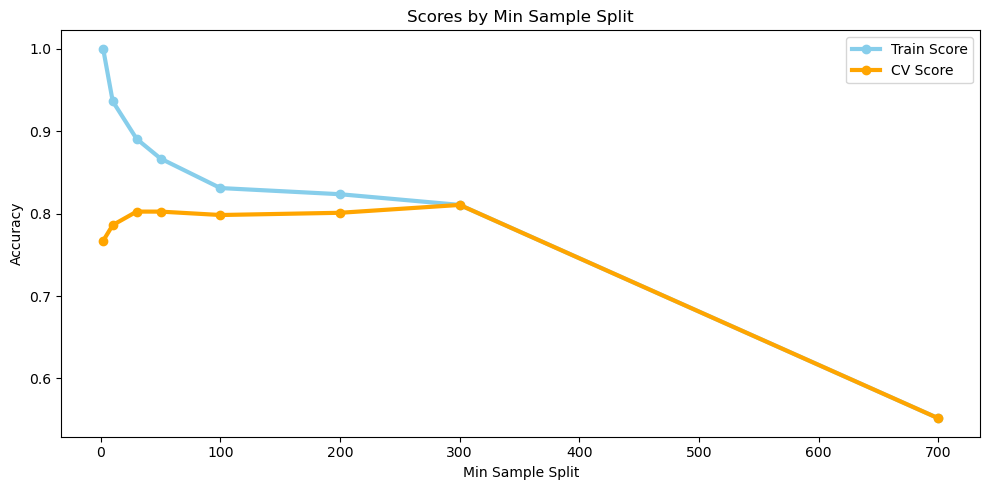

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5), layout='tight')
ax.plot(min_samples_split_list, np.mean([x['train_score'] for x in scores], axis=1), '-o', c='skyblue', linewidth=3, label='Train Score')
ax.plot(min_samples_split_list, np.mean([x['test_score'] for x in scores], axis=1), '-o', c='orange', linewidth=3, label='CV Score')
ax.set(title='Scores by Min Sample Split', xlabel='Min Sample Split', ylabel='Accuracy')
ax.legend(loc='best');

In [15]:
best_min_sample_split = min_samples_split_list[np.argmax(np.mean([x['test_score'] for x in scores], axis=1))]
best_min_sample_split

300

In [17]:
from sklearn.ensemble import RandomForestClassifier
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.

scores = []
for max_depth in max_depth_list:
    clf = RandomForestClassifier(max_depth=max_depth, random_state=STATE)
    score = cross_validate(clf, X_train, y_train, cv=5, return_train_score=True, scoring='accuracy')
    scores.append(score)

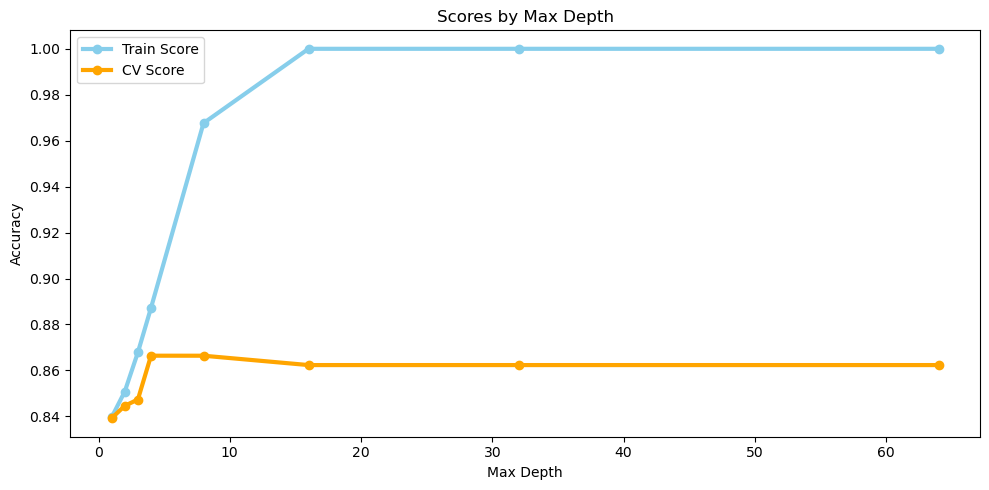

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5), layout='tight')
ax.plot(max_depth_list, np.mean([x['train_score'] for x in scores], axis=1), '-o', c='skyblue', linewidth=3, label='Train Score')
ax.plot(max_depth_list, np.mean([x['test_score'] for x in scores], axis=1), '-o', c='orange', linewidth=3, label='CV Score')
ax.set(title='Scores by Max Depth', xlabel='Max Depth', ylabel='Accuracy')
ax.legend(loc='best');

In [19]:
best_max_depth = max_depth_list[np.argmax(np.mean([x['test_score'] for x in scores], axis=1))]
best_max_depth

4

In [20]:
from sklearn.metrics import accuracy_score
decision_tree_model = DecisionTreeClassifier(min_samples_split=300, max_depth=4, random_state=STATE).fit(X_train, y_train)
print(f'Train Accuracy is {accuracy_score(y_train, decision_tree_model.predict(X_train))}')
print(f'Test Accuracy is {accuracy_score(y_test, decision_tree_model.predict(X_test))}')

Train Accuracy is 0.8106267029972752
Test Accuracy is 0.8260869565217391


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=STATE)

param_grid = {
    'min_samples_split': [2,10, 30, 50, 100, 200, 300, 700],
    'max_depth': [2, 4, 8, 16, 32, 64, None],
    'n_estimators': [10,50,100,500]
}


gsv = GridSearchCV(clf, param_grid, cv=2, scoring='accuracy', return_train_score=True, n_jobs=4)
gsv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=55), n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'min_samples_split': [2, 10, 30, 50, 100, 200, 300,
                                               700],
                         'n_estimators': [10, 50, 100, 500]},
             return_train_score=True, scoring='accuracy')

In [22]:
gsv.best_params_

{'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 500}

In [23]:
clf = gsv.best_estimator_
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8858695652173914


In [26]:
# Let's try with XGBoost
from xgboost import XGBClassifier


X_train_fit, X_train_eval, y_train_fit, y_train_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=STATE)

clf = XGBClassifier(n_estimators=500, min_samples_split=2, max_depth=8, learning_rate=1e-2, verbosity=0)
# clf.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds=10)
clf.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[0]	validation_0-logloss:0.68451
[1]	validation_0-logloss:0.67980
[2]	validation_0-logloss:0.67513
[3]	validation_0-logloss:0.67054
[4]	validation_0-logloss:0.66614
[5]	validation_0-logloss:0.66174
[6]	validation_0-logloss:0.65750
[7]	validation_0-logloss:0.65337
[8]	validation_0-logloss:0.64926
[9]	validation_0-logloss:0.64533
[10]	validation_0-logloss:0.64179
[11]	validation_0-logloss:0.63780
[12]	validation_0-logloss:0.63417
[13]	validation_0-logloss:0.63026
[14]	validation_0-logloss:0.62680
[15]	validation_0-logloss:0.62304
[16]	validation_0-logloss:0.61956
[17]	validation_0-logloss:0.61662
[18]	validation_0-logloss:0.61338
[19]	validation_0-logloss:0.60992
[20]	validation_0-logloss:0.60673
[21]	validation_0-logloss:0.60346
[22]	validation_0-logloss:0.60031
[23]	validation_0-logloss:0.59715
[24]	validation_0-logloss:0.59429
[25]	validation_0-logloss:0.59117
[26]	validation_0-logloss:0.58829
[27]	validation_0-logloss:0.58534
[28]	validation_0-logloss:0.58269
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_split=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8913043478260869


In [ ]:
clf.best_iteration